# Imports

In [109]:
#you must import 6 libraries!
import numpy as np
import matplotlib.pyplot as plt
import Inflow
Inflow.logging.enable_logging()
import ResearchProjects
import pandas as pd
import one

In [110]:
#adaptation is a sublibrary within the ResearchProject
from ResearchProjects import adaptation
#inside adaptation experiment there are different file, we import the "aliases"
from ResearchProjects.adaptation import aliases

# Database access

In [111]:
connector = one.ONE()
connector.set_data_access_mode('remote')
ResearchProjects.core?
ResearchProjects.adaptation.select.cells_labelled
display(ResearchProjects.adaptation.select.cells_labelled)

<function ResearchProjects.adaptation.select.cells_labelled(rois_df, iscell=True, **kwargs)>

Type:        module
String form: <module 'ResearchProjects.core' from 'C:\\Users\\mohay\\anaconda3\\envs\\Analysis\\lib\\site-packages\\ResearchProjects\\core.py'>
File:        c:\users\mohay\anaconda3\envs\analysis\lib\site-packages\researchprojects\core.py
Docstring:   <no docstring>

## Selection of a session

In [112]:
sessions = connector.search(subject = 'wm24', date_range = "2022-08-22", number = 1,  details = True)
#wm24_2022_08_22_001 is a good one for imaging data
display(sessions) ###In the session we have just just one session??

subject           start_time  number   
id                                                                          
04f92e4a-da64-4018-aa6c-d9a79a91c831    wm24  2022-08-22T15:27:00       1  \

                                           lab      projects   
id                                                             
04f92e4a-da64-4018-aa6c-d9a79a91c831  HaissLab  [Adaptation]  \

                                                                                    url   
id                                                                                        
04f92e4a-da64-4018-aa6c-d9a79a91c831  http://157.99.138.172/sessions/04f92e4a-da64-4...  \

                                     task_protocol        date   
id                                                               
04f92e4a-da64-4018-aa6c-d9a79a91c831                2022-08-22  \

                                                                                   json   
id                                                                                        
04f92e4a-da64-4018-aa6c-d9a79a91c831  {'channels': ['R', 'G'], 'whisker_stims': {'St...  \

                                                      extended_qc   
id                                                                  
04f92e4a-da64-4018-aa6c-d9a79a91c831  {'exclude_whisker': ['C1']}  \

                                                 rel_path   
id                                                          
04f92e4a-da64-4018-aa6c-d9a79a91c831  wm24\2022-08-22\001  \

                                               alias_name   
id                                                          
04f92e4a-da64-4018-aa6c-d9a79a91c831  wm24_2022_08_22_001  \

                                               short_path   
id                                                          
04f92e4a-da64-4018-aa6c-d9a79a91c831  wm24\2022-08-22\001  \

                                                                                   path  
id                                                                                       
04f92e4a-da64-4018-aa6c-d9a79a91c831  \\Mountcastle\lab\data\ONE\Adaptation\wm24\202...

In [56]:
session = sessions.iloc[0] #gives us all the details about row #0
print(session)

subject                                                       wm24
start_time                                     2022-08-22T15:27:00
number                                                           1
lab                                                       HaissLab
projects                                              [Adaptation]
url              http://157.99.138.172/sessions/04f92e4a-da64-4...
task_protocol                                                     
date                                                    2022-08-22
json             {'channels': ['R', 'G'], 'whisker_stims': {'St...
extended_qc                            {'exclude_whisker': ['C1']}
rel_path                                       wm24\2022-08-22\001
alias_name                                     wm24_2022_08_22_001
short_path                                     wm24\2022-08-22\001
path             \\Mountcastle\lab\data\ONE\Adaptation\wm24\202...
Name: 04f92e4a-da64-4018-aa6c-d9a79a91c831, dtype: object


In [57]:
connector.explorer(session.path)

# Loading the data from that session

## trials_df

In [113]:
trials_df = adaptation.pipelines.get_trials_df( session_details = session) #Getting all the trials for one session
display(trials_df)
print(session)

Trial Start  Stimulus Ref  Stimulus It  Stimulus right  Electr Stim   
trial#                                                                        
0           62894.0        3000.0      65893.0             1.0          0.0  \
1           70443.0        3000.0      73442.0             0.0          0.0   
2           78178.0        3000.0      81177.0             1.0          0.0   
3           86129.0        3000.0      89128.0             0.0          0.0   
4           93858.0        3000.0      96857.0             0.0          0.0   
...             ...           ...          ...             ...          ...   
145       1153883.0        3000.0    1156882.0             1.0          0.0   
146       1161725.0        3000.0    1164724.0             1.0          0.0   
147       1169237.0        3000.0    1172236.0             1.0          0.0   
148       1176793.0        3000.0    1179792.0             1.0          0.0   
149       1184567.0        3000.0    1187566.0             0.0          0.0   

        Curr water duration  Timepoint of valve opening  Data acquisition   
trial#                                                                      
0                     100.0                      3800.0            1250.0  \
1                     100.0                      3800.0            1250.0   
2                     100.0                      3800.0            1250.0   
3                     100.0                      3800.0            1250.0   
4                     100.0                      3800.0            1250.0   
...                     ...                         ...               ...   
145                   100.0                      3800.0            1250.0   
146                   100.0                      3800.0            1250.0   
147                   100.0                      3800.0            1250.0   
148                   100.0                      3800.0            1250.0   
149                   100.0                      3800.0            1250.0   

        Free Choice On  current TDMS_p1 trial  ... Start of Dec Per   
trial#                                         ...                    
0                  0.0                    0.0  ...           3000.0  \
1                  0.0                    1.0  ...           3000.0   
2                  0.0                    2.0  ...           3000.0   
3                  0.0                    3.0  ...           3000.0   
4                  0.0                    4.0  ...           3000.0   
...                ...                    ...  ...              ...   
145                0.0                  145.0  ...           3000.0   
146                0.0                  146.0  ...           3000.0   
147                0.0                  147.0  ...           3000.0   
148                0.0                  148.0  ...           3000.0   
149                0.0                  149.0  ...           3000.0   

       End of Dec Per End of trial  Trial + ITI  Result   
trial#                                                    
0              5500.0       5800.0       7549.0     2.0  \
1              5500.0       5800.0       7735.0     2.0   
2              5500.0       5800.0       7951.0     2.0   
3              5500.0       5800.0       7729.0     2.0   
4              5500.0       5800.0       7429.0     2.0   
...               ...          ...          ...     ...   
145            5500.0       5800.0       7842.0     2.0   
146            5500.0       5800.0       7512.0     2.0   
147            5500.0       5800.0       7556.0     2.0   
148            5500.0       5800.0       7774.0     2.0   
149            5500.0       5800.0       7327.0     2.0   

                                                tiff_path  target_stim   
trial#                                                                   
0       \\Mountcastle\lab\data\ONE\Adaptation\wm24\202...     C1_10_90  \
1       \\Mountcastle\lab\data\ONE\Adaptation\wm24\202...     D1

subject                                                       wm24
start_time                                     2022-08-22T15:27:00
number                                                           1
lab                                                       HaissLab
projects                                              [Adaptation]
url              http://157.99.138.172/sessions/04f92e4a-da64-4...
task_protocol                                                     
date                                                    2022-08-22
json             {'channels': ['R', 'G'], 'whisker_stims': {'St...
extended_qc                            {'exclude_whisker': ['C1']}
rel_path                                       wm24\2022-08-22\001
alias_name                                     wm24_2022_08_22_001
short_path                                     wm24\2022-08-22\001
path             \\Mountcastle\lab\data\ONE\Adaptation\wm24\202...
Name: 04f92e4a-da64-4018-aa6c-d9a79a91c831, dtype: object


## rois_df

In [114]:
rois_df = adaptation.pipelines.get_rois_df( session_details = session )

In [60]:
#rois_df = adaptation.pipelines.generate_rois_df(session_details = session, refresh = True, sigma = 50, F0_index = 50, upper_perc = 70, lower_perc = 30)

In [115]:
rois_df

ypix   
roi#                                                      
0     [31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 3...  \
1     [41, 41, 41, 42, 42, 42, 42, 42, 42, 43, 43, 4...   
2     [50, 50, 50, 51, 51, 51, 51, 51, 51, 52, 52, 5...   
3     [53, 53, 53, 53, 53, 53, 54, 54, 54, 54, 54, 5...   
4     [56, 57, 57, 57, 57, 57, 57, 58, 58, 58, 58, 5...   
5     [61, 61, 61, 61, 62, 62, 62, 62, 62, 62, 63, 6...   
6     [102, 102, 102, 102, 103, 103, 103, 103, 103, ...   
7     [106, 106, 106, 106, 106, 107, 107, 107, 107, ...   
8     [113, 113, 113, 114, 114, 114, 114, 114, 114, ...   
9     [113, 113, 113, 113, 114, 114, 114, 114, 114, ...   
10    [121, 121, 121, 121, 121, 121, 122, 122, 122, ...   
11    [124, 125, 125, 125, 125, 126, 126, 126, 126, ...   
12    [128, 128, 128, 129, 129, 129, 129, 129, 130, ...   
13    [133, 134, 134, 134, 134, 134, 134, 134, 134, ...   
14    [135, 135, 135, 135, 136, 136, 136, 136, 136, ...   
15    [141, 141, 141, 141, 141, 142, 142, 142, 142, ...   
16    [177, 177, 177, 178, 178, 178, 178, 178, 178, ...   
17    [185, 185, 185, 185, 185, 186, 186, 186, 186, ...   
18    [226, 226, 226, 226, 226, 227, 227, 227, 227, ...   
19    [232, 233, 233, 234, 234, 234, 234, 235, 235, ...   
20    [245, 245, 245, 245, 245, 246, 246, 246, 246, ...   
21    [248, 248, 248, 248, 248, 249, 249, 249, 249, ...   
22    [266, 266, 266, 267, 267, 267, 267, 267, 268, ...   
23    [272, 272, 272, 273, 273, 273, 273, 273, 273, ...   
24    [296, 296, 296, 296, 296, 296, 297, 297, 297, ...   
25    [303, 303, 304, 304, 304, 304, 304, 304, 305, ...   
26    [324, 324, 324, 324, 324, 324, 324, 325, 325, ...   
27    [329, 330, 330, 330, 330, 330, 330, 330, 330, ...   
28    [353, 353, 353, 353, 353, 353, 354, 354, 354, ...   
29    [382, 382, 382, 382, 383, 383, 383, 383, 383, ...   
30    [385, 385, 386, 386, 386, 386, 386, 387, 387, ...   
31    [425, 425, 425, 425, 425, 426, 426, 426, 426, ...   
32    [427, 427, 427, 427, 428, 428, 428, 428, 428, ...   
33    [459, 459, 459, 459, 459, 460, 460, 460, 460, ...   
34    [468, 468, 469, 469, 469, 469, 469, 470, 470, ...   

                                                   xpix   
roi#                                                      
0     [336, 337, 338, 339, 340, 341, 342, 343, 344, ...  \
1     [313, 314, 315, 311, 312, 313, 314, 315, 316, ...   
2     [181, 182, 183, 179, 180, 181, 182, 183, 184, ...   
3     [300, 301, 302, 303, 304, 305, 299, 300, 301, ...   
4     [339, 336, 337, 338, 339, 340, 341, 335, 336, ...   
5     [187, 188, 189, 190, 186, 187, 188, 189, 190, ...   
6     [191, 192, 193, 194, 189, 190, 191, 192, 193, ...   
7     [308, 309, 310, 311, 312, 307, 308, 309, 310, ...   
8     [252, 253, 254, 250, 251, 252, 253, 254, 255, ...   
9     [278, 279, 280, 281, 277, 278, 279, 280, 281, ...   
10    [213, 214, 215, 216, 217, 218, 212, 213, 214, ...   
11    [267, 266, 267, 268, 269, 265, 266, 267, 268, ...   
12    [175, 176, 177, 174, 175, 176, 177, 178, 174, ...   
13    [196, 191, 192, 193, 194, 195, 196, 197, 198, ...   
14    [317, 318, 320, 321, 317, 318, 319, 320, 321, ...   
15    [276, 277, 278, 279, 280, 275, 276, 277, 278, ...   
16    [315, 316, 317, 314, 315, 316, 317, 318, 319, ...   
17    [246, 247, 248, 249, 250, 245, 246, 247, 248, ...   
18    [461, 462, 463, 464, 465, 460, 461, 462, 463, ...   
19    [195, 195, 196, 195, 196, 197, 199, 195, 196, ...   
20    [325, 326, 327, 328, 329, 324, 325, 326, 327, ...   
21    [236, 237, 238, 239, 240, 234, 235, 236, 237, ...   
22    [157, 158, 159, 156, 157, 158, 159, 160, 155, ...   
23    [305, 306, 307, 303, 304, 305, 306, 307, 308, ...   
24    [240, 241, 242, 243, 244, 245, 239, 240, 241, ...   
25    [226, 227, 223, 224, 225, 226, 227, 228, 223, ...   
26    [304, 305, 306, 307, 308, 309, 310, 302, 303, ...   
27    [223, 219, 220, 221, 222, 223, 224, 225, 226, ...   
28    [340, 341, 342, 343, 344, 345, 338, 339, 340, ...   
29    [347, 348, 349, 350, 345, 346, 3

## trials_roi_df

In [62]:
trials_roi_df = adaptation.pipelines.generate_trials_roi_df(rois_df, trials_df, session_details = session, refresh_main_only = True)

LOAD_INFO  : load_preprocessing           : Found and loaded timelines_dict file. Skipping processing
INFO       : suite2p_tiff_verification    : Suite2p output length and total lenth of the fiff files provided in the trials_df are valid.
INFO       : trials_roi_df                : Splitting and aligning ['F', 'F_var', 'Fneu', 'Fneu_var', 'spks'] by #trial and #roi multi index.
LOAD_INFO  : load_preprocessing           : Found and loaded timelines_dict file. Skipping processing
SAVE_INFO  : preprocessed_data            : Saving processed trials_roi_df data at wm24\2022-08-22\001\preprocessing_saves\preproc_data.trials_roi_df.pickle (overwriting)


## Show the fluorescence of the trials for only the roi 0

In [63]:
adaptation.plots.show_traces_averages(trials_roi_df.loc[0:0])

# Classifying

## Example of how to extract feature points from first trial of the first roi only

In [64]:
series = trials_roi_df.iloc[0] #only take the first trial of the ROI as a test dataset(trial zero)
#why we extract features of one trial?

In [65]:
features = adaptation.classifiers.extract_features(series)

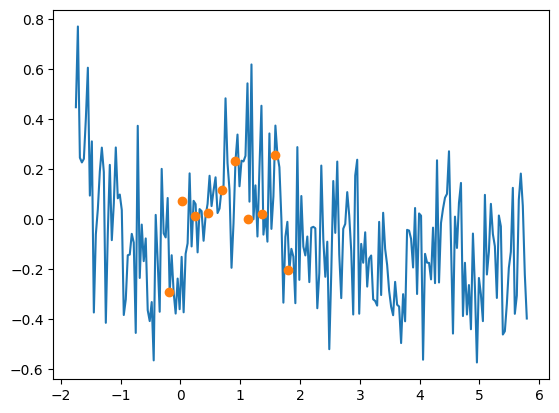

In [66]:
plt.plot( *series['F_var'].pack )
plt.plot( *features.pack , 'o' )

In [67]:
trials_roi_df

F   
roi# trial#                                                      
0    0       [110.48663330078125, 131.6634063720703, 86.054...  \
     1       [67.9014892578125, 84.18050384521484, 79.32645...   
     2       [68.5937728881836, 60.977806091308594, 68.2375...   
     3       [88.68118286132812, 103.54595947265625, 58.293...   
     4       [67.2108154296875, 93.54744720458984, 47.41284...   
...                                                        ...   
34   145     [79.01573944091797, 149.42901611328125, 109.14...   
     146     [70.81188201904297, 130.8088836669922, 74.7765...   
     147     [67.38467407226562, 104.03815460205078, 66.875...   
     148     [101.09800720214844, 79.50180053710938, 98.070...   
     149     [94.76374053955078, 106.85689544677734, 66.061...   

                                                         F_var   
roi# trial#                                                      
0    0       [0.44800236099089397, 0.7714516639019757, 0.24...  \
     1       [-0.32539554129285003, 0.023858377160785173, -...   
     2       [-0.17911552203251063, 0.18014861315202807, -0...   
     3       [-0.15754997708637508, -0.5217095653778792, -0...   
     4       [-0.2178897487180029, -0.11685176608670593, -0...   
...                                                        ...   
34   145     [0.28543534597878606, 0.14659601694516844, 0.4...   
     146     [-0.09959991718158123, 0.10129027462650247, 0....   
     147     [-0.6525859803693786, -0.3806188309835738, -0....   
     148     [0.08084930191997584, -0.10169227498872888, -0...   
     149     [0.1908002463908141, -0.09864775120552391, -0....   

                                                          Fneu   
roi# trial#                                                      
0    0       [81.11736297607422, 93.11980438232422, 73.6161...  \
     1       [52.151588439941406, 65.11491394042969, 51.899...   
     2       [57.168704986572266, 70.49388885498047, 47.332...   
     3       [57.833740234375, 44.317848205566406, 55.43520...   
     4       [55.2567253112793, 59.00489044189453, 56.47432...   
...                                                        ...   
34   145     [81.04872131347656, 76.43589782714844, 87.0641...   
     146     [68.32051086425781, 74.994873046875, 89.817947...   
     147     [50.0487174987793, 59.089744567871094, 65.0923...   
     148     [74.46154022216797, 68.3974380493164, 61.12307...   
     149     [78.14871978759766, 68.52820587158203, 57.7435...   

                                                      Fneu_var   
roi# trial#                                                      
0    0       [0.44800236099089397, 0.7714516639019757, 0.24...  \
     1       [-0.32539554129285003, 0.023858377160785173, -...   
     2       [-0.17911552203251063, 0.18014861315202807, -0...   
     3       [-0.15754997708637508, -0.5217095653778792, -0...   
     4       [-0.2178897487180029, -0.11685176608670593, -0...   
...                                                        ...   
34   145     [0.28543534597878606, 0.14659601694516844, 0.4...   
     146     [-0.09959991718158123, 0.10129027462650247, 0....   
     147     [-0.6525859803693786, -0.3806188309835738, -0....   
     148     [0.08084930191997584, -0.10169227498872888, -0...   
     149     [0.1908002463908141, -0.09864775120552391, -0....   

                                                          spks is_VGAT  is_C1   
roi# trial#                                                                     
0    0       [0.0, 0.0, 0.0, 0.0, 2.942286491394043, 0.0, 0...   False  False  \
     1       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   False  False   
     2       [0.0, 0.0, 9.140109062194824, 9.33862686157226...   False  False   
     3       [0.0, 0.0, 0.0, 0.0, 0.25519195199012756, 0.0,...   False  False   
     4       [0.0, 0.0, 0.0, 4.29819917678833, 0.0, 0.0, 0....   False  False   
...                                                       

## Extraction for all trials of the whole session
We store them in the new column "features" that gets created here

In [68]:
all_features = trials_roi_df.apply( adaptation.classifiers.extract_features , axis = 1)
trials_roi_df.loc[:,"features"] = all_features

## Separating sample trials and test trials for the first roi only

In [69]:
first_roi = trials_roi_df.loc[0:0]

In [70]:
training_data, test_data = adaptation.classifiers.get_sample_and_training(first_roi, frac = 0.75) 
#get 75% of all trials in first roi as training data

In [95]:
len(training_data), len(test_data) , len(first_roi) 
#training data is the data we will get to the machine to learn how to predict, each has 10 features
#then we need to test whether this data helped the machine to predict or not, so we will get 25% of trials as sample,
#to see it it predict based on the feature son these 25 sample that what is happening 
#each time randomly we change sample and training data, to check which one works beteer and why?

(112, 38, 150)

In [94]:
#From Chat GPT: Bootstrap classification is a type of resampling technique used in machine 
#learning to evaluate the stability and reliability of a classification model. In this technique, 
#multiple random samples of the original dataset are created by randomly selecting data points with replacement. 
#Each of these samples is then used to train a separate classification model, 
#and the predictions of these models are combined to make a final prediction.

In [96]:
#give the machine features of trials and ask him to predict what was the target amplitude

def get_score(training_data, test_data):
    
    training_inputs = np.array(list(training_data['features']))
    training_outputs = np.array(training_data['target_amplitude'])
    
    test_inputs = np.array(list(test_data['features']))
    test_outputs = np.array(test_data['target_amplitude']) 
    
    classifier = sklearn.svm.LinearSVC()
    classifier.fit(training_inputs,training_outputs)
    
    score = classifier.score(test_inputs,test_outputs)   #to know how much your trained machine is good at predicting you ask him to give you a score 
    training_trials = training_data.index.get_level_values("trial#")
    test_trials = test_data.index.get_level_values("trial#")
    
    result = {'score':score,'training_trials':training_trials,'test_trials':test_trials}
    #you created  result dictionary, gives you the score, tells you this score comes from which training trials and test trials
    return result
#100 times get 75% of trials as training data and 25% as sample data, give them to the machine , ask the score, each time randomly
def bootstrap_classify(dataframe, frac = 0.75, iter_count = 100): #https://en.wikipedia.org/wiki/Bootstrap_aggregating
    scores =[]
    for _ in range(iter_count):
        training_data, test_data = adaptation.classifiers.get_sample_and_training(dataframe, frac = frac)
        score = get_score(training_data,test_data)
        scores.append(score)
 
    values = []
    for item in scores:
        values.append(item["score"])  #then you need the meadian of all the scores you got from different trials   
        
    meta_result = {'data' : scores, 'scores' : values, 'average_score' : np.median(np.array(values)) }
    return meta_result

In [90]:
first_roi

F   
roi# trial#                                                      
0    0       [110.48663330078125, 131.6634063720703, 86.054...  \
     1       [67.9014892578125, 84.18050384521484, 79.32645...   
     2       [68.5937728881836, 60.977806091308594, 68.2375...   
     3       [88.68118286132812, 103.54595947265625, 58.293...   
     4       [67.2108154296875, 93.54744720458984, 47.41284...   
...                                                        ...   
     145     [74.84498596191406, 51.94773864746094, 107.228...   
     146     [98.53752136230469, 59.3669319152832, 81.53830...   
     147     [113.19007110595703, 66.31562805175781, 59.043...   
     148     [70.78560638427734, 42.672210693359375, 73.129...   
     149     [84.0759048461914, 123.96839904785156, 116.421...   

                                                         F_var   
roi# trial#                                                      
0    0       [0.44800236099089397, 0.7714516639019757, 0.24...  \
     1       [-0.32539554129285003, 0.023858377160785173, -...   
     2       [-0.17911552203251063, 0.18014861315202807, -0...   
     3       [-0.15754997708637508, -0.5217095653778792, -0...   
     4       [-0.2178897487180029, -0.11685176608670593, -0...   
...                                                        ...   
     145     [-0.01820918607240805, -0.015286885737646978, ...   
     146     [-0.07075263048698627, -0.14321302983827025, -...   
     147     [-0.27854251373066036, 0.2195061242315473, 0.2...   
     148     [-0.1387883226963254, -0.6539329094909159, -0....   
     149     [-0.25454560318475217, 0.3316156094474721, -0....   

                                                          Fneu   
roi# trial#                                                      
0    0       [81.11736297607422, 93.11980438232422, 73.6161...  \
     1       [52.151588439941406, 65.11491394042969, 51.899...   
     2       [57.168704986572266, 70.49388885498047, 47.332...   
     3       [57.833740234375, 44.317848205566406, 55.43520...   
     4       [55.2567253112793, 59.00489044189453, 56.47432...   
...                                                        ...   
     145     [57.141807556152344, 57.246944427490234, 57.49...   
     146     [55.0904655456543, 52.400978088378906, 51.8728...   
     147     [47.371639251708984, 65.85330200195312, 67.334...   
     148     [52.67970657348633, 33.567237854003906, 52.039...   
     149     [48.581905364990234, 70.33007049560547, 40.303...   

                                                      Fneu_var   
roi# trial#                                                      
0    0       [0.44800236099089397, 0.7714516639019757, 0.24...  \
     1       [-0.32539554129285003, 0.023858377160785173, -...   
     2       [-0.17911552203251063, 0.18014861315202807, -0...   
     3       [-0.15754997708637508, -0.5217095653778792, -0...   
     4       [-0.2178897487180029, -0.11685176608670593, -0...   
...                                                        ...   
     145     [-0.01820918607240805, -0.015286885737646978, ...   
     146     [-0.07075263048698627, -0.14321302983827025, -...   
     147     [-0.27854251373066036, 0.2195061242315473, 0.2...   
     148     [-0.1387883226963254, -0.6539329094909159, -0....   
     149     [-0.25454560318475217, 0.3316156094474721, -0....   

                                                          spks is_VGAT  is_C1   
roi# trial#                                                                     
0    0       [0.0, 0.0, 0.0, 0.0, 2.942286491394043, 0.0, 0...   False  False  \
     1       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   False  False   
     2       [0.0, 0.0, 9.140109062194824, 9.33862686157226...   False  False   
     3       [0.0, 0.0, 0.0, 0.0, 0.25519195199012756, 0.0,...   False  False   
     4       [0.0, 0.0, 0.0, 4.29819917678833, 0.0, 0.0, 0....   False  False   
...                                                       

In [97]:
len(first_roi)

150

#we added this to the function we wrote 
value = 0
for item in scores:
    value = value + item["score"]
average_score = value/len(scores)
average_score

In [116]:
plt.boxplot(values)
plt.axhline(0.5, ls = '--', color = 'gray')
plt.ylim(0,1)

(0.0, 1.0)

In [101]:
values = []
for item in scores:
    values.append(item["score"])
plt.plot(values,'o')
plt.axhline(0.5)
plt.ylim(0,1)

NameError: name 'scores' is not defined

In [117]:
scores

NameError: name 'scores' is not defined

In [102]:
training_data

F   
roi# trial#                                                      
0    27      [84.06704711914062, 64.12518310546875, 82.7639...  \
     89      [100.48384094238281, 58.31154251098633, 34.267...   
     61      [45.047698974609375, 80.32709503173828, 86.065...   
     29      [52.862815856933594, 81.0198974609375, 58.4936...   
     145     [74.84498596191406, 51.94773864746094, 107.228...   
...                                                        ...   
     18      [57.56557083129883, 51.068687438964844, 58.784...   
     46      [66.25225067138672, 70.46928405761719, 81.0243...   
     60      [43.493316650390625, 67.37313079833984, 41.901...   
     1       [67.9014892578125, 84.18050384521484, 79.32645...   
     11      [94.21552276611328, 86.79850769042969, 85.0309...   

                                                         F_var   
roi# trial#                                                      
0    27      [0.13275637081627137, -0.5002529915514548, -0....  \
     89      [-0.2118148036565822, -0.17777621414661174, -0...   
     61      [0.024156074799225682, -0.29131259425713013, 0...   
     29      [-0.08420647129191677, -0.05084344653211932, -...   
     145     [-0.01820918607240805, -0.015286885737646978, ...   
...                                                        ...   
     18      [-0.005997255257728517, -0.2022945641621877, 0...   
     46      [-0.2951114471823508, -0.26006837876560024, -0...   
     60      [-0.15413821610496273, -0.16581109112988884, -...   
     1       [-0.32539554129285003, 0.023858377160785173, -...   
     11      [0.10451741410126203, -0.12455170707257092, 0....   

                                                          Fneu   
roi# trial#                                                      
0    27      [65.09046173095703, 41.603912353515625, 56.581...  \
     89      [52.82884979248047, 54.09291076660156, 58.7799...   
     61      [61.78728485107422, 50.0831298828125, 66.60635...   
     29      [57.039119720458984, 58.27383804321289, 45.249...   
     145     [57.141807556152344, 57.246944427490234, 57.49...   
...                                                        ...   
     18      [59.70415496826172, 52.420536041259766, 59.970...   
     46      [48.51833724975586, 49.81418228149414, 55.4621...   
     60      [54.811737060546875, 54.37897491455078, 53.264...   
     1       [52.151588439941406, 65.11491394042969, 51.899...   
     11      [64.93887329101562, 56.437652587890625, 71.378...   

                                                      Fneu_var   
roi# trial#                                                      
0    27      [0.13275637081627137, -0.5002529915514548, -0....  \
     89      [-0.2118148036565822, -0.17777621414661174, -0...   
     61      [0.024156074799225682, -0.29131259425713013, 0...   
     29      [-0.08420647129191677, -0.05084344653211932, -...   
     145     [-0.01820918607240805, -0.015286885737646978, ...   
...                                                        ...   
     18      [-0.005997255257728517, -0.2022945641621877, 0...   
     46      [-0.2951114471823508, -0.26006837876560024, -0...   
     60      [-0.15413821610496273, -0.16581109112988884, -...   
     1       [-0.32539554129285003, 0.023858377160785173, -...   
     11      [0.10451741410126203, -0.12455170707257092, 0....   

                                                          spks is_VGAT  is_C1   
roi# trial#                                                                     
0    27      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   False  False  \
     89      [0.0, 0.0, 0.0, 2.820892810821533, 5.042201519...   False  False   
     61      [0.0, 1.9810150861740112, 0.0, 0.0, 0.0, 0.0, ...   False  False   
     29      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   False  False   
     145     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   False  False   
...                                                       

## Formatting inputs and outputs for the classifier package sklearn

In [81]:
inputs = training_data['features']
inputs.iloc[5]

TimelinedArray([-0.40049108, -0.06159115, -0.13542947, -0.09375131,
                -0.15822192, -0.26564429, -0.14321994, -0.1337692 ,
                -0.49653342, -0.0535423 ])

In [82]:
outputs = training_data['target_amplitude']
outputs.iloc[5]

'10_90'

In [83]:
training_inputs = np.array(list(inputs))
training_outputs = np.array(outputs)

In [84]:
test_inputs = np.array(list(test_data['features']))
test_outputs = np.array(test_data['target_amplitude'])

## Creating a blank classifier, and training it (fit)

In [85]:
import sklearn
classifier = sklearn.svm.LinearSVC()
classifier.fit(training_inputs,training_outputs)

LinearSVC()

## Asessing the score of the classifier using test data

In [86]:
classifier.score(test_inputs,test_outputs)

0.5526315789473685

In [87]:
trials_roi_df.columns
trials_roi_df.rpow ###Gramatical Error?
trials_roi_df.iloc[0]

F                      [110.48663330078125, 131.6634063720703, 86.054...
F_var                  [0.44800236099089397, 0.7714516639019757, 0.24...
Fneu                   [81.11736297607422, 93.11980438232422, 73.6161...
Fneu_var               [0.44800236099089397, 0.7714516639019757, 0.24...
spks                   [0.0, 0.0, 0.0, 0.0, 2.942286491394043, 0.0, 0...
is_VGAT                                                            False
is_C1                                                              False
is_neuron                                                           True
is_D1                                                               True
target_stim                                                     C1_10_90
nontarget_stim                                                     D1_10
in_target_barrel                                                   False
target_amplitude                                                   10_90
nontarget_amplitude                                

# Grouping data on conditions 

in target barrel is  (False,) for this group


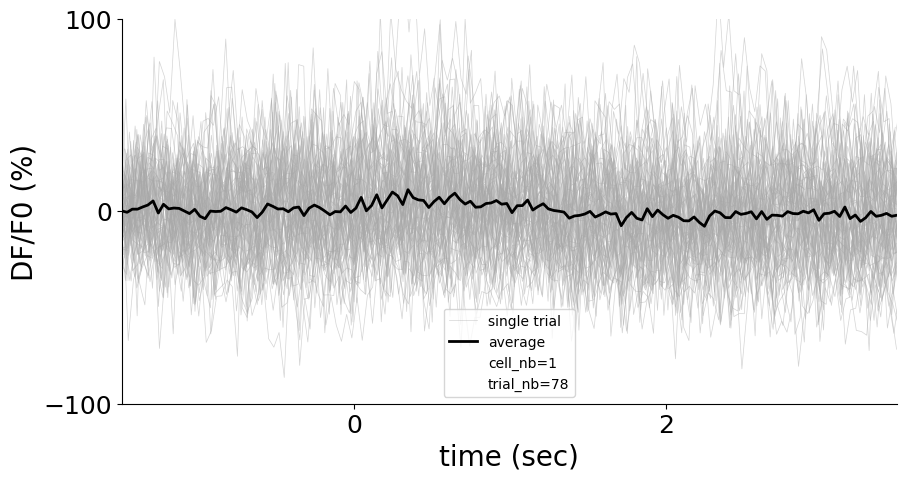

0.5


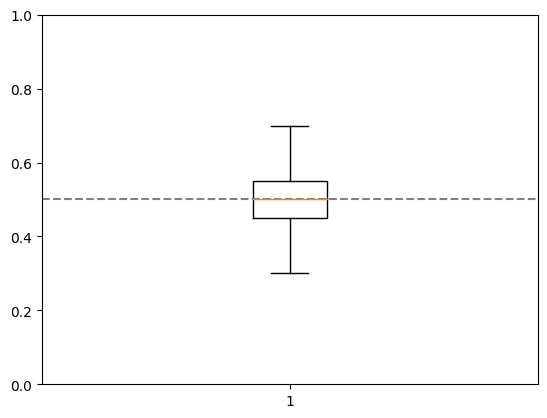

in target barrel is  (True,) for this group


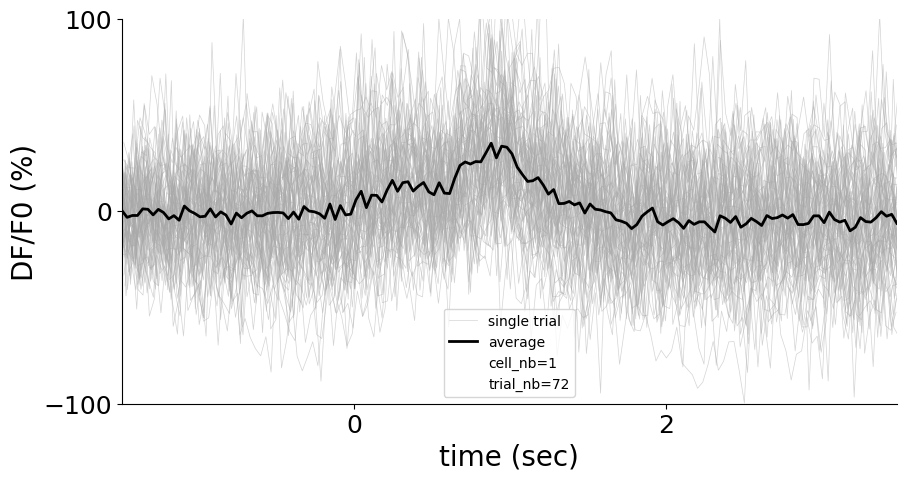

0.6666666666666666


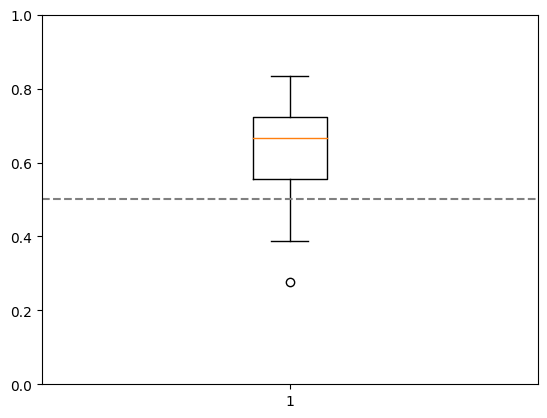

In [88]:
selection = trials_roi_df.loc[0:0]
for condition, group_df in selection.groupby(by = ["in_target_barrel"]):
    print("in target barrel is ",condition, "for this group")
    #display(group_df)
    adaptation.plots.show_traces_averages(group_df)
    score = bootstrap_classify(group_df)
    print(score["average_score"])
    plt.boxplot(score["scores"])
    plt.axhline(0.5, ls = '--', color = 'gray')
    plt.ylim(0,1)
    plt.show()

in_target_barrel is :  True  for this group
amplitude is :  10_20  for this group


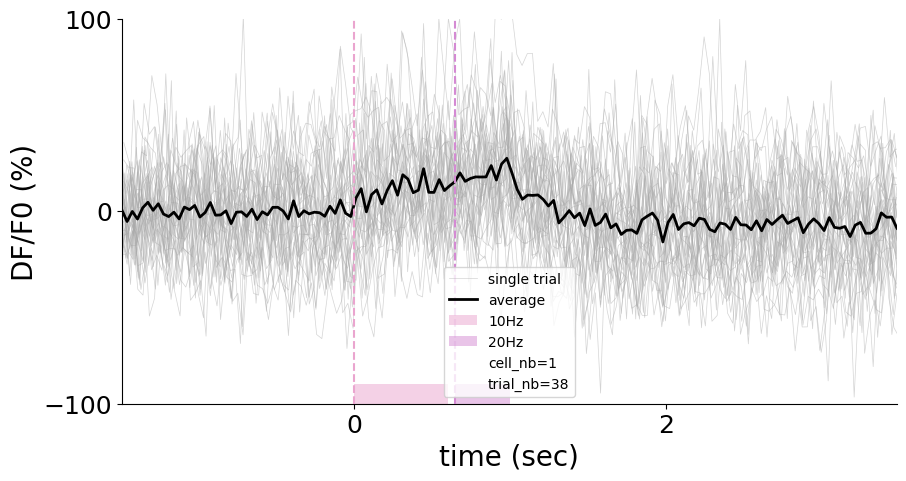

in_target_barrel is :  True  for this group
amplitude is :  10_90  for this group


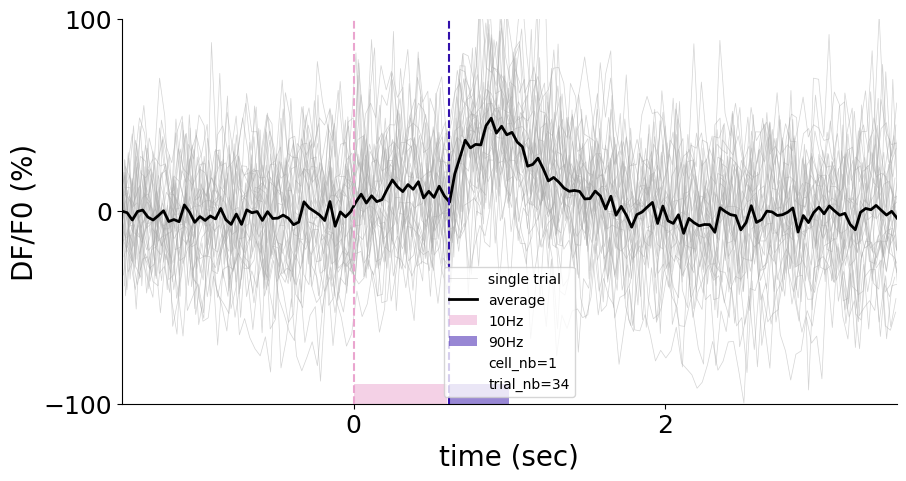

In [170]:
for (in_target_barrel,target_amplitude), group_df in selection.groupby(by = ["in_target_barrel","target_amplitude"]):
    if in_target_barrel == False : 
        continue
    print("in_target_barrel is : " , in_target_barrel, " for this group")
    print("amplitude is : " , target_amplitude, " for this group")
    #display(group_df)
    adaptation.plots.show_traces_averages(group_df)

target amplitude is :  10_20  for this group
nontarget amplitude is :  0  for this group


target amplitude is :  10_20  for this group
nontarget amplitude is :  10  for this group


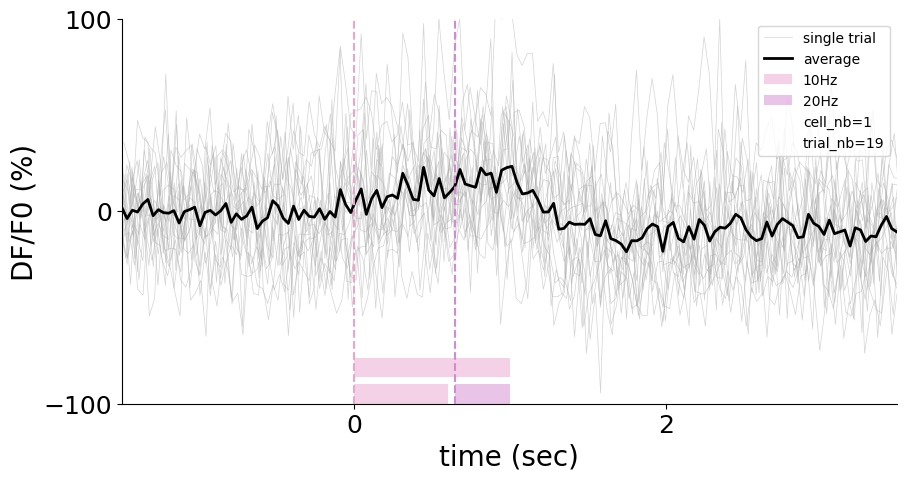

target amplitude is :  10_90  for this group
nontarget amplitude is :  0  for this group


target amplitude is :  10_90  for this group
nontarget amplitude is :  10  for this group


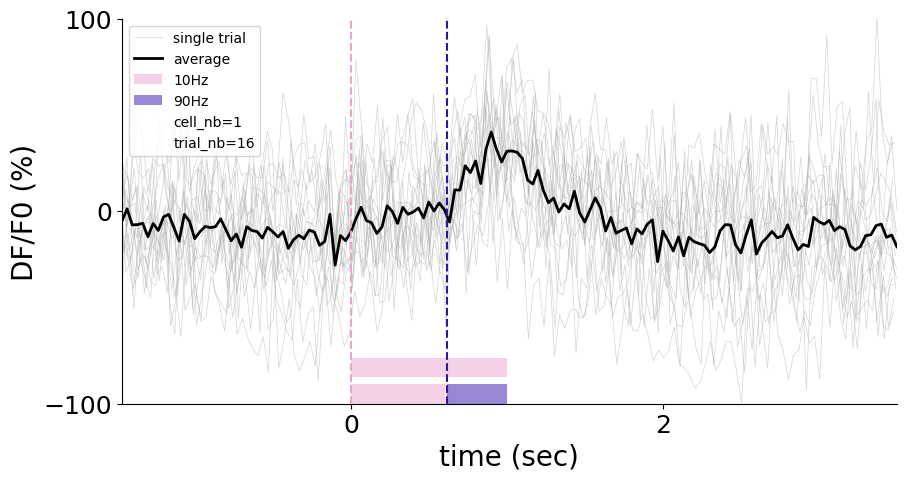

In [172]:
for (in_target_barrel,target_amplitude,nontarget_amplitude), group_df in selection.groupby(by = ["in_target_barrel","target_amplitude","nontarget_amplitude"]):
    if in_target_barrel == False : 
        continue
    print("target amplitude is : " , target_amplitude, " for this group")
    print("nontarget amplitude is : " , nontarget_amplitude, " for this group")
    #display(group_df)
    adaptation.plots.show_traces_averages(group_df)

In [173]:
all_conditions = ["is_C1","is_D1","target_stim","nontarget_stim","in_target_barrel","target_amplitude","nontarget_amplitude"]

In [178]:
results_list = []
for results, _  in trials_roi_df.groupby(all_conditions):
    results_list.append({key : value for key,value in zip(all_conditions,results)})


In [187]:
pd.DataFrame( results_list)

is_C1  is_D1 target_stim nontarget_stim  in_target_barrel   
0   False  False    C1_10_20          D1_10             False  \
1   False  False    C1_10_20         D1_NaN             False   
2   False  False    C1_10_90          D1_10             False   
3   False  False    C1_10_90         D1_NaN             False   
4   False  False    D1_10_20          C1_10             False   
5   False  False    D1_10_20         C1_NaN             False   
6   False  False    D1_10_90          C1_10             False   
7   False  False    D1_10_90         C1_NaN             False   
8   False   True    C1_10_20          D1_10             False   
9   False   True    C1_10_20         D1_NaN             False   
10  False   True    C1_10_90          D1_10             False   
11  False   True    C1_10_90         D1_NaN             False   
12  False   True    D1_10_20          C1_10              True   
13  False   True    D1_10_20         C1_NaN              True   
14  False   True    D1_10_90          C1_10              True   
15  False   True    D1_10_90         C1_NaN              True   
16   True  False    C1_10_20          D1_10              True   
17   True  False    C1_10_20         D1_NaN              True   
18   True  False    C1_10_90          D1_10              True   
19   True  False    C1_10_90         D1_NaN              True   
20   True  False    D1_10_20          C1_10             False   
21   True  False    D1_10_20         C1_NaN             False   
22   True  False    D1_10_90          C1_10             False   
23   True  False    D1_10_90         C1_NaN             False   

   target_amplitude nontarget_amplitude  
0             10_20                  10  
1             10_20                   0  
2             10_90                  10  
3             10_90                   0  
4             10_20                  10  
5             10_20                   0  
6             10_90                  10  
7             10_90                   0  
8             10_20                  10  
9             10_20                   0  
10            10_90                  10  
11            10_90                   0  
12            10_20                  10  
13            10_20                   0  
14            10_90                  10  
15            10_90                   0  
16            10_20                  10  
17            10_20                   0  
18            10_90                  10  
19            10_90                   0  
20            10_20                  10  
21            10_20                   0  
22            10_90                  10  
23            10_90                   0

In [182]:
pd.DataFrame.from_dict?

Signature:
pd.DataFrame.from_dict(
    data: 'dict',
    orient: 'str' = 'columns',
    dtype: 'Dtype | None' = None,
    columns: 'Axes | None' = None,
) -> 'DataFrame'
Docstring:
Construct DataFrame from dict of array-like or dicts.

Creates DataFrame object from dictionary by columns or by index
allowing dtype specification.

Parameters
----------
data : dict
    Of the form {field : array-like} or {field : dict}.
orient : {'columns', 'index', 'tight'}, default 'columns'
    The "orientation" of the data. If the keys of the passed dict
    should be the columns of the resulting DataFrame, pass 'columns'
    (default). Otherwise if the keys should be rows, pass 'index'.
    If 'tight', assume a dict with keys ['index', 'columns', 'data',
    'index_names', 'column_names'].

    .. versionadded:: 1.4.0
       'tight' as an allowed value for the ``orient`` argument

dtype : dtype, default None
    Data type to force after DataFrame construction, otherwise infer.
columns : list, default